In [8]:
import pandas as pd

test_cache_path = '/home/wjunneng/Python/2019-Construction-And-Forecast-Of-Telecom-Customer-Churn-Model/data/cache/test.h5'
train_15p_cache_path = '/home/wjunneng/Python/2019-Construction-And-Forecast-Of-Telecom-Customer-Churn-Model/data/cache/train_15p.h5'
train_85p_cache_path = '/home/wjunneng/Python/2019-Construction-And-Forecast-Of-Telecom-Customer-Churn-Model/data/cache/train_85p.h5'

test = pd.read_hdf(path_or_buf=test_cache_path, mode='r', key='test')
train_15p = pd.read_hdf(path_or_buf=train_15p_cache_path, mode='r', key='train_15p')
train_85p = pd.read_hdf(path_or_buf=train_85p_cache_path, mode='r', key='train_85p')

del test['Churn']




In [9]:
test.head()




,id,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge
0,1,128,415,25,265.000,110,45.06250,197.375,99,16.781250,244.750,91,11.007812,10.000000,3,2.699219
1,2,107,415,26,161.625,123,27.46875,195.500,103,16.625000,254.375,103,11.453125,13.703125,3,3.699219
2,8,147,415,0,157.000,79,26.68750,103.125,94,8.757812,211.750,96,9.531250,7.101562,6,1.919922
3,13,168,408,0,128.750,96,21.90625,104.875,71,8.921875,141.125,128,6.351562,11.203125,2,3.019531
4,14,95,510,0,156.625,88,26.62500,247.625,75,21.046875,192.250,115,8.648438,12.296875,5,3.320312


In [10]:
train_15p.head()




,id,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,Churn
0,6,118,510,0,223.37500,98,37.968750,220.625,101,18.750000,203.875,118,9.179688,6.300781,6,1.700195,0
1,9,117,408,0,184.50000,97,31.375000,351.500,80,29.890625,215.750,90,9.710938,8.703125,4,2.349609,0
2,11,65,415,0,129.12500,137,21.953125,228.500,83,19.421875,208.750,111,9.398438,12.703125,6,3.429688,1
3,22,77,408,0,62.40625,89,10.609375,169.875,121,14.437500,209.625,64,9.429688,5.699219,6,1.540039,1
4,40,149,408,0,140.37500,94,23.875000,271.750,92,23.093750,188.250,108,8.468750,11.101562,9,3.000000,0


In [13]:
X_train, y_train = train_15p.iloc[:, :-1], train_15p.iloc[:, -1]

X_test = test
print(X_train.shape, y_train.shape, X_test.shape)




(600, 16) (600,) (1000, 16)


In [16]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

model_factory = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0), warm_start=True),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()
]

for model in model_factory:
    model.seed = 42
    num_folds = 3

    scores = cross_val_score(model, X_train, y_train, cv=num_folds, scoring='r2', n_jobs=8)
    score_description = " %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2)

    print('{model:25} CV-5 R2: {score}'.format(
        model=model.__class__.__name__,
        score=score_description
    ))




KNeighborsClassifier      CV-5 R2:  -1.72 (+/- 2.81)
SVC                       CV-5 R2:  -0.17 (+/- 0.01)
SVC                       CV-5 R2:  -0.17 (+/- 0.01)
GaussianProcessClassifier CV-5 R2:  -0.17 (+/- 0.01)
DecisionTreeClassifier    CV-5 R2:  -0.46 (+/- 0.73)
RandomForestClassifier    CV-5 R2:  -0.16 (+/- 0.12)
MLPClassifier             CV-5 R2:  -0.17 (+/- 0.01)
AdaBoostClassifier        CV-5 R2:  -0.63 (+/- 0.66)
GaussianNB                CV-5 R2:  -0.58 (+/- 1.36)
QuadraticDiscriminantAnalysis CV-5 R2:  -0.50 (+/- 1.03)


In [17]:

from sklearn.utils import shuffle
from sklearn.base import BaseEstimator, RegressorMixin

class PseudoLabeler(BaseEstimator, RegressorMixin):
    """
    Sci-kit learn wrapper for creating pseudo-lebeled estimators.
    """
    
    def __init__(self, model, unlabled_data, features, target, sample_rate=0.2, seed=42):
        """
        @sample_rate - percent of samples used as pseudo-labelled data
                       from the unlabled dataset
        """
        assert sample_rate <= 1.0, 'Sample_rate should be between 0.0 and 1.0.'
        
        self.sample_rate = sample_rate
        self.seed = seed
        self.model = model
        self.model.seed = seed
        
        self.unlabled_data = unlabled_data
        self.features = features
        self.target = target
        
    def get_params(self, deep=True):
        return {
            "sample_rate": self.sample_rate,
            "seed": self.seed,
            "model": self.model,
            "unlabled_data": self.unlabled_data,
            "features": self.features,
            "target": self.target
        }

    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self

        
    def fit(self, X, y):
        """
        Fit the data using pseudo labeling.
        """

        augemented_train = self.__create_augmented_train(X, y)
        self.model.fit(
            augemented_train[self.features],
            augemented_train[self.target]
        )
        
        return self


    def __create_augmented_train(self, X, y):
        """
        Create and return the augmented_train set that consists
        of pseudo-labeled and labeled data.
        """        
        num_of_samples = int(len(self.unlabled_data) * self.sample_rate)
        
        # Train the model and creat the pseudo-labels
        self.model.fit(X, y)
        pseudo_labels = self.model.predict(self.unlabled_data[self.features])
        
        # Add the pseudo-labels to the test set
        pseudo_data = self.unlabled_data.copy(deep=True)
        pseudo_data[self.target] = pseudo_labels
        
        # Take a subset of the test set with pseudo-labels and append in onto
        # the training set
        sampled_pseudo_data = pseudo_data.sample(n=num_of_samples)
        temp_train = pd.concat([X, y], axis=1)
        augemented_train = pd.concat([sampled_pseudo_data, temp_train])

        return shuffle(augemented_train)
        
    def predict(self, X):
        """
        Returns the predicted values.
        """
        return self.model.predict(X)
    
    def get_model_name(self):
        return self.model.__class__.__name__




In [22]:
from xgboost import XGBClassifier

model = PseudoLabeler(
    XGBClassifier(nthread=10),
    X_test,
    X_test.columns,
    'Churn'
)

model.fit(X_train, y_train)
predict = model.predict(train_85p)




In [31]:
from xgboost import XGBClassifier
model_factory = [
    XGBClassifier(nthread=10),
    
    PseudoLabeler(
        XGBClassifier(nthread=10),
        X_test,
        X_test.columns,
        'Churn',
        sample_rate=0.3
    ),
]

for model in model_factory:
    model.seed = 42
    num_folds = 8
    
    scores = cross_val_score(model, X_train, y_train, cv=num_folds, scoring='accuracy', n_jobs=8)
    score_description = "R2: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2)

    print('{model:25} CV-{num_folds} {score_cv}'.format(
        model=model.__class__.__name__,
        num_folds=num_folds,
        score_cv=score_description
    ))
    
    
    

XGBClassifier             CV-8 R2: 0.8059 (+/- 0.3911)
PseudoLabeler             CV-8 R2: 0.8800 (+/- 0.0904)


KNeighborsClassifier
GaussianProcessClassifier
DecisionTreeClassifier
RandomForestClassifier
MLPClassifier
AdaBoostClassifier
GaussianNB
QuadraticDiscriminantAnalysis
XGBClassifier
LGBMClassifier
{'KNeighborsClassifier': [0.8516666666666666, 0.8533333333333333, 0.8566666666666667, 0.86, 0.8566666666666667, 0.8583333333333332, 0.86, 0.8550000000000001, 0.8550000000000001, 0.8533333333333333], 'GaussianProcessClassifier': [0.8583333333333332, 0.8583333333333332, 0.8583333333333332, 0.8583333333333332, 0.8583333333333332, 0.8583333333333332, 0.8583333333333332, 0.8583333333333332, 0.8583333333333332, 0.8583333333333332], 'DecisionTreeClassifier': [0.7233333333333334, 0.7266666666666667, 0.73, 0.7266666666666667, 0.7266666666666667, 0.7216666666666667, 0.7150000000000001, 0.7233333333333334, 0.725, 0.72], 'RandomForestClassifier': [0.8583333333333332, 0.8583333333333332, 0.8583333333333332, 0.8583333333333332, 0.8583333333333332, 0.8583333333333332, 0.8583333333333332, 0.8583333333333332, 

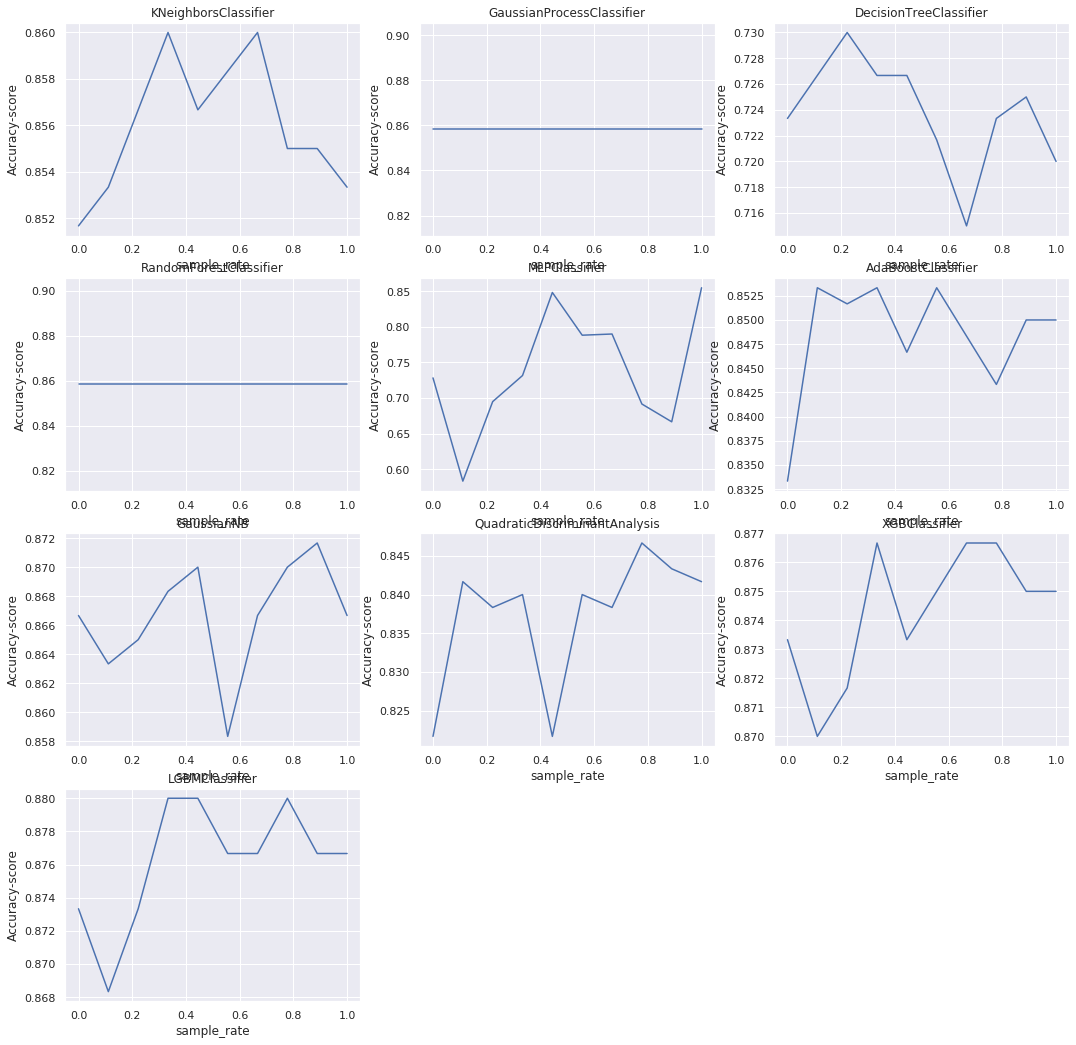

In [30]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from lightgbm import LGBMClassifier

sns.set(color_codes=True)
sample_rates = np.linspace(0, 1, 10)

def pseudo_label_wrapper(model):
    return PseudoLabeler(model, train_85p, train_85p.columns, 'Churn')

# List of all models to test
model_factory = [
    KNeighborsClassifier(3),
    GaussianProcessClassifier(1.0 * RBF(1.0), warm_start=True),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    XGBClassifier(),
    LGBMClassifier()
]

# Apply the PseudoLabeler class to each model
model_factory = map(pseudo_label_wrapper, model_factory)

# Train each model with different sample rates
results = {}
num_folds = 5

for model in model_factory:
    model_name = model.get_model_name()
    print('%s' % model_name)

    results[model_name] = list()
    for sample_rate in sample_rates:
        model.sample_rate = sample_rate
        
        # Calculate the CV-3 R2 score and store it
        scores = cross_val_score(model, X_train, y_train, cv=num_folds, scoring='accuracy', n_jobs=11)
        results[model_name].append(scores.mean())

print(results)
    
plt.figure(figsize=(18, 18))

i = 1
for model_name, performance in results.items():    
    plt.subplot(4, 3, i)
    i += 1
    
    plt.plot(sample_rates, performance)
    plt.title(model_name)
    plt.xlabel('sample_rate')
    plt.ylabel('Accuracy-score')
    

plt.show()